# Content-based Recommendation System

To do so, we will explore our courses' contents and try to find courses with similar contents to recommend to the user based on their interest.

It may be done by many ways, we will explore a few and choose the one with the best results that satisfies our needs.

# Initial imports

In [1]:
import pprint as pp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [2]:
df = pd.read_csv('content.csv')

# Exploring Data

In [3]:
df

,Code,Name,Content
0,M150,Programming and Computer Applications,FORTRAN Programming language: Constants and va...
1,CS102,Computer Programming(1),"Problem-solving strategies, Debugging strategi..."
2,CS201,Computer Programming(2),"Functions and parameter passing, Simple I/O, E..."
3,CS202,Data Structures and File Processing,Specification and representation of the elemen...
4,CS203,Discrete Structures,"Functions: Surjection’s, Injections, Inverses,..."
5,CS204,Theory of Computation,Deterministic finite automata (DFA) and regula...
6,CS206,Advanced Programming,"Object-oriented design, Classes, Subclasses an..."
7,CS208,Computer Architecture and Organization,"Simple building blocks (logic gates, flip-flop..."
8,CS210,Network and Internet Programming,"Encoding, Framing, Error detection, Ethernet, ..."
9,CS212,Concepts of Programming Language,"Scheme, Expression evaluation and a simple mod..."


In [4]:
df[["Content"]].head()

,Content
0,FORTRAN Programming language: Constants and va...
1,"Problem-solving strategies, Debugging strategi..."
2,"Functions and parameter passing, Simple I/O, E..."
3,Specification and representation of the elemen...
4,"Functions: Surjection’s, Injections, Inverses,..."


In [5]:
df[['Name','Content']].head()

,Name,Content
0,Programming and Computer Applications,FORTRAN Programming language: Constants and va...
1,Computer Programming(1),"Problem-solving strategies, Debugging strategi..."
2,Computer Programming(2),"Functions and parameter passing, Simple I/O, E..."
3,Data Structures and File Processing,Specification and representation of the elemen...
4,Discrete Structures,"Functions: Surjection’s, Injections, Inverses,..."


## Define a certain course index to test with

In [6]:
courseIndex = 34            # ML

## Extract features from text

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## But first, we need to understand some stuff, like, what is TfidfVectorizer?

**TfidfVectorizer** is a utility that helps building **feature vectors** from text documents, we can't do Machine Learning on raw text, it has to be "encoded" into numbers.

## How does TfidfVectorizer work?
Well, first, it counts each word number of occurrences in the documents, then constructs Tfidf Vector

### But, what is Tf-idf anyways?

**Term Frequency-Inverse Document Frequency** is a numerical statistic that demonstrates how important a word is to a corpus.

**Term Frequency is** just ratio number of current word to the number of all words in document.

![Sorry, couldn't find image](./images/tf.png "TF")

Where nt (the number of term frequency "ti" in current document) / the sum of nk which is the number of all terms in current document.

**Inverse Document Frequency** is a log of the ratio of the number of all documents in the corpus to the number of documents with term ti.

![Sorry, couldn't find image](./images/idf.png "IDF")

Tf-idf(t, d, D) is the product tf(t, d) to idf(t, D).

![Sorry, couldn't find image](./images/tf-idf.png "TF-IDF")


## Looking closely how it's done

In [8]:
vectorizer = TfidfVectorizer(stop_words = 'english')
features = vectorizer.fit_transform(df["Content"]).todense()
features

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

# But what was that matrix? all zeros?! what have we donnne!
### Let's see, shall we?

It's because the result of the fit_transform() function is a **sparse matrix**; 
A sparse matrix is the one with most elements = 0, we converted it to a matrix by using todense() function to be able to continue.

## See Vocabulary
### It's a dictionary with words as keys and its index as value, alphabetically ordered.

In [9]:
pp.pprint(vectorizer.vocabulary_)

{'1st': 0,
 '2d': 1,
 '3nf': 2,
 '4nf': 3,
 '80386': 4,
 '80486': 5,
 '95': 6,
 'ability': 7,
 'abstract': 8,
 'abstraction': 9,
 'abstractions': 10,
 'acceptance': 11,
 'access': 12,
 'accuracy': 13,
 'acquisition': 14,
 'action': 15,
 'actions': 16,
 'adaptive': 17,
 'adaptors': 18,
 'adders': 19,
 'additive': 20,
 'address': 21,
 'addressing': 22,
 'advance': 23,
 'advanced': 24,
 'aes': 25,
 'affine': 26,
 'affordances': 27,
 'agents': 28,
 'aggregate': 29,
 'aggregation': 30,
 'ai': 31,
 'aims': 32,
 'algebra': 33,
 'algebraic': 34,
 'algorithm': 35,
 'algorithms': 36,
 'algorithmsbased': 37,
 'aliasing': 38,
 'alignment': 39,
 'alignments': 40,
 'allpairs': 41,
 'alpha': 42,
 'alternation': 43,
 'alternatives': 44,
 'alu': 45,
 'ambient': 46,
 'ambiguity': 47,
 'amgu': 48,
 'amortization': 49,
 'analysis': 50,
 'analytical': 51,
 'analyzers': 52,
 'animation': 53,
 'annealing': 54,
 'ant': 55,
 'anti': 56,
 'api': 57,
 'applets': 58,
 'application': 59,
 'applications': 60,
 'app

In [10]:
pp.pprint(df["Content"][0])
dummy = pd.DataFrame(vectorizer.fit_transform([df["Content"][0]]).todense(),columns = vectorizer.get_feature_names())
dummy

('FORTRAN Programming language: Constants and variables, Intrinsic functions, '
 'Loops, Conditional statements, Arrays - Array operations in FORTRAN 95, '
 'Functions and subroutines MATLAB programming, Using derive, Applications.')


,95,applications,array,arrays,conditional,constants,derive,fortran,functions,intrinsic,language,loops,matlab,operations,programming,statements,subroutines,using,variables
0,0.188982,0.188982,0.188982,0.188982,0.188982,0.188982,0.188982,0.377964,0.377964,0.188982,0.188982,0.188982,0.188982,0.188982,0.377964,0.188982,0.188982,0.188982,0.188982


In [11]:
pp.pprint(df["Content"][0])
dummy = pd.DataFrame(CountVectorizer(stop_words = 'english').fit_transform([df["Content"][0]]).todense(),columns = vectorizer.get_feature_names())
dummy

('FORTRAN Programming language: Constants and variables, Intrinsic functions, '
 'Loops, Conditional statements, Arrays - Array operations in FORTRAN 95, '
 'Functions and subroutines MATLAB programming, Using derive, Applications.')


,95,applications,array,arrays,conditional,constants,derive,fortran,functions,intrinsic,language,loops,matlab,operations,programming,statements,subroutines,using,variables
0,1,1,1,1,1,1,1,2,2,1,1,1,1,1,2,1,1,1,1


In [12]:
print(features.shape)

(44, 1364)


### 44 Document & 1364 word in our vocabulary

In [13]:
print(len(features))

44


# K-Means Clustering

K-means clustering is one of the most popular unsupervised machine learning algorithms.

The objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

A cluster refers to a collection of data points aggregated together because of certain similarities.

### How does it work?

We will define a target number k, which refers to the number of centroids we need in the dataset.
        A centroid is the imaginary or real location representing the center of the cluster.

 Every data point is allocated to each of the clusters through reducing the Inter-cluster sum of squares.

In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

      The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

![Sorry, couldn't find image](./images/kmeans1.png "K-Means")


## Import it

In [14]:
from sklearn.cluster import KMeans

In [15]:
n_clusters = 14

In [16]:
def checkSameCluster(df, courseIndex, test_courseIndex, n_clusters):
    
    #Check if the two courses are in the same cluster
    
    """

    Arguments:
    df -- DataFrame of all the courses data ["Code", "Name", "Content"]
    courseIndex -- First course we want to test
    test_courseIndex -- Second course we want to test
    n_clusters -- Number of clusters we want to assign all courses to

    Returns:
    
    kmeans.labels_ -- Cluster to which each course is assigned
    res[0] (Boolean value) -- Whether the two courses are in the same cluster or not
    
    """
    
    # Feature extraction
    tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
    tfidf = tfidf_vectorizer.fit_transform(df["Content"])
    
    # Fitting model
    kmeans = KMeans(n_clusters).fit(tfidf)
    
    # Test similarity
    test_courses = [df.iloc[courseIndex]["Content"], df.iloc[test_courseIndex]["Content"]]
    
    # see which cources belong to which cluster 
    #print(kmeans.labels_)
    
    #print(len(kmeans.labels_))  #gives 44 as there are 44 courses
    
    res = kmeans.predict(tfidf_vectorizer.transform(test_courses))
    
    return kmeans.labels_, res[0] == res[1]

In [17]:
res = checkSameCluster(df, courseIndex, 13, n_clusters)    #ML with AI
print(res[1])
resdf = pd.DataFrame(res[0], columns= ["Assigned To Cluster"])
resdf

True


,Assigned To Cluster
0,10
1,10
2,10
3,5
4,7
5,9
6,11
7,5
8,4
9,10


## Function to get cluster courses (similars)
#### API

In [18]:
def getSimsKM(df, courseIndex, resdf, n_clusters):
    
    #Get similar courses; the ones in the same cluster
    
    """

    Arguments:
    
    df -- DataFrame of all the courses data ["Code", "Name", "Content"]
    courseIndex -- Course we want to get its similars
    resdf -- Result DataFrame; which has each course index mapped to its assigned cluster
    n_clusters -- Number of clusters we assigned all courses to

    Returns:
    
    s -- List of similar courses to the given course
    
    """
    
    s = []
    cluster = resdf.iloc[courseIndex]["Assigned To Cluster"]
    for c in range(len(resdf)):
        if resdf.iloc[c]["Assigned To Cluster"] == cluster:
            #print(df.iloc[c]["Code"])
            s.append(c)

    return s

In [19]:
s = getSimsKM(df, courseIndex, resdf, n_clusters)
s

[13, 16, 29, 34]

## Print them

In [20]:
def printSimilarsKM(df, s, courseIndex, n_clusters):
    
    #Print similar courses
    
    """

    Arguments:
    
    df -- DataFrame of all the courses data ["Code", "Name", "Content"]
    s -- List of similar courses
    courseIndex -- Course we wanted to find its similars
    n_clusters -- Number of clusters we want to assign all courses to

    Returns:
    
    kmeans.labels_ -- Labels of each point
    Boolean value -- Whether the two courses are in the same cluster
    
    """
    
    print("Courses similar to "+df.iloc[courseIndex]["Name"]+" are:",'\n')
    
    for i in range(len(s)):
        if s[i] != courseIndex:
            print(df.iloc[s[i]])

In [21]:
printSimilarsKM(df, s, courseIndex, n_clusters)

Courses similar to Machine Learning are: 

Code                                                   CS303
Name                                 Artificial Intelligence
Content    Definitions of intelligent systems, Optimality...
Name: 13, dtype: object
Code                                                   CS306
Name                           Logic and Automated Reasoning
Content    Elementary set theory, Propositional logic, Pr...
Name: 16, dtype: object
Code                                                   CS319
Name                          Tools for e-learning Education
Content    Overview of principles and tools used in e-Lea...
Name: 29, dtype: object


# How do we know we chose the right k, no more, no less?

## Evaluation
### Elbow method

Recall that, the basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. 
The total WSS measures the compactness of the clustering and we want it to be as small as possible.

The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

![Sorry, couldn't find image](./images/elbow.png "Elbow method")



Text(0, 0.5, 'Sum squared distance')

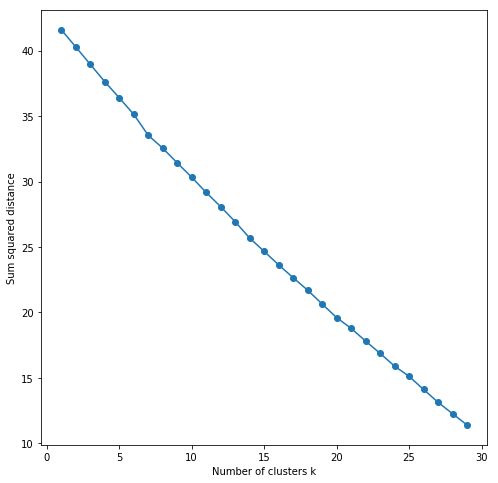

In [22]:
sse = []
kRange = list(range(1, 30))

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(df["Content"])
    
for k in kRange:
    km = KMeans(n_clusters=k)
    km.fit(tfidf)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(8, 8))
plt.plot(kRange, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum squared distance')

It's not showing a uniform elbow-like shape, so we will stick with 14 as it doesn't change even with k = more
#### The more clusters we make, the less number of courses per cluster thus more entropy

## Try another visualization to evaluate

In [23]:
from yellowbrick.cluster import KElbowVisualizer

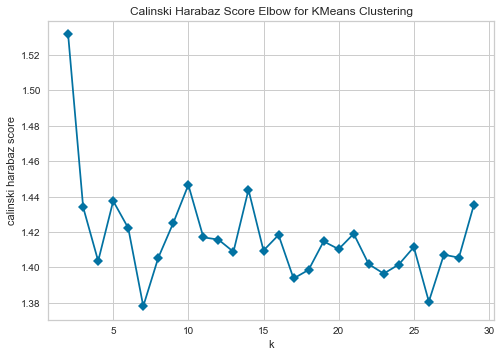

In [24]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), metric='calinski_harabaz', timings=False)

visualizer.fit(tfidf.toarray())    # Fit the data to the visualizer
visualizer.poof()    # Draw the data

**Maybe K-means is not the best algorithm for our problem!**
Let's try another

#  
# KNN (K Nearest Neighbors)

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. “Birds of a feather flock together.”

![Sorry, couldn't find image](./images/knn1.png "KNN")

Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

# Scikit-learn has an unsupervised version on KNN

**Unsupervised KNN, yes, you read it right!**
#### Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors
The unsupervised KNN does not associate a label to instances. (hence the unsupervised term, da!)
All it can do is tell you what instances in your training data is k-nearest to the point you are testing for.

## Which is PERFECT for our case

![Sorry, couldn't find image](./images/knn2.jpeg "KNN Meme")

## Import it

In [25]:
from sklearn.neighbors import NearestNeighbors

## Define number of neighbors (similar courses)

In [26]:
n_neighbors = 6  # Gives same test course + nearest 5

def calculate_KNN(df, features, courseIndex, n_neighbors):
    
    #Defines a KNN and fits our data to it, then gets neigbours of a specific course
    
    """

    Arguments:
    
    df -- DataFrame of all the courses data ["Code", "Name", "Content"]
    features -- Matrix of our data's tf-idf values
    courseIndex -- Course we want to find its similars
    n_neighbors -- Number of neighbors of the test course

    Returns:
    
    NNs -- Course neighbors (similars)
    
    """
    
    # Define model and fit it to our data
    # We don't need to worry about overfitting because we actually want it to learn the data so much :"D

    KNN = NearestNeighbors(n_neighbors, p=2)
    KNN.fit(features)
    
    # Use it to get neighbors
    NNs = KNN.kneighbors(features[courseIndex], return_distance=True) 

    return NNs

In [27]:
NNs = calculate_KNN(df, features, courseIndex, n_neighbors)

In [28]:
#type(NNs[1][0][0])
NNs

(array([[ 0.        ,  1.23241501,  1.2578861 ,  1.34380081,  1.34404315,
          1.35055667]]), array([[34, 13, 29, 36, 19, 40]]))

## Define a function to print the nearest neighbors

In [29]:
def printNNs(df, NNs, courseIndex):
    
    # Prints neighbors
    
    """

    Arguments:
    
    df -- DataFrame of all the courses data ["Code", "Name", "Content"]
    courseIndex -- Course we want to print its similars
    NNs -- Course neighbors (similars)

    Returns:
    None
    
    """
    
    print("Courses similar to "+df.iloc[courseIndex]["Name"]+" are:",'\n')
    for i in range(len(NNs[1][0])):
        if i != 0 :
            print(df.iloc[NNs[1][0][i]])

In [30]:
printNNs(df, NNs, courseIndex)

Courses similar to Machine Learning are: 

Code                                                   CS303
Name                                 Artificial Intelligence
Content    Definitions of intelligent systems, Optimality...
Name: 13, dtype: object
Code                                                   CS319
Name                          Tools for e-learning Education
Content    Overview of principles and tools used in e-Lea...
Name: 29, dtype: object
Code                                                   CS403
Name                                     Distributed Systems
Content    Basic distributed systems architecture, Hardwa...
Name: 36, dtype: object
Code                                                   CS309
Name                                    Computing Algorithms
Content    Complexity of algorithms, Asymptotic notation,...
Name: 19, dtype: object
Code                                                   CS407
Name                              System Analysis and Design
Content

## Define a function to return the nearest neighbors' code
### Use with API

In [31]:
def returnNNs(df, NNs, courseIndex):
    
    # Returns neighbors
    
    """

    Arguments:
    
    df -- DataFrame of all the courses data ["Code", "Name", "Content"]
    courseIndex -- Course we want to print its similars
    NNs -- Course neighbors (similars)

    Returns:
    
    json -- Dictionary that has similar courses' codes
    
    """
    
    json = []
    for i in range(len(NNs[1][0])):
        dic_nn = {}
        if i != 0 :
            dic_nn['code']= df.iloc[NNs[1][0][i]]["Code"]
            json.append(dic_nn)
    return json

In [32]:
nns = returnNNs(df, NNs, courseIndex)
nns

[{'code': 'CS303'},
 {'code': 'CS319'},
 {'code': 'CS403'},
 {'code': 'CS309'},
 {'code': 'CS407'}]

## Another Example; Use different course [HCI]

In [33]:
NNs2 = calculate_KNN(df, features, 23, n_neighbors)
printNNs(df, NNs2, 23)

Courses similar to Introduction to Human-Computer Interaction (HCI) are: 

Code                                                   CS322
Name                    Usability Models and Theories of HCI
Content    Computer systems usability, Theoretical founda...
Name: 32, dtype: object
Code                                                   CS212
Name                        Concepts of Programming Language
Content    Scheme, Expression evaluation and a simple mod...
Name: 9, dtype: object
Code                                                   CS214
Name                          System Simulation and Modeling
Content    Types of systems, Types of models, Discrete an...
Name: 10, dtype: object
Code                                                   CS401
Name                                       Computer Graphics
Content    Raster and vector graphics system, Video displ...
Name: 35, dtype: object
Code                                                   CS406
Name                                 

## Another Example; Use different course [C102]

In [34]:
NNs3 = calculate_KNN(df, features, 1, n_neighbors)
printNNs(df, NNs3, 1)

Courses similar to Computer Programming(1) are: 

Code                                                   CS212
Name                        Concepts of Programming Language
Content    Scheme, Expression evaluation and a simple mod...
Name: 9, dtype: object
Code                                                  CS201 
Name                                 Computer Programming(2)
Content    Functions and parameter passing, Simple I/O, E...
Name: 2, dtype: object
Code                                                    M150
Name                   Programming and Computer Applications
Content    FORTRAN Programming language: Constants and va...
Name: 0, dtype: object
Code                                                   CS314
Name                                    Parallel Computation
Content    Parallel configurations and paradigms, Speedup...
Name: 24, dtype: object
Code                                                   CS309
Name                                    Computing Algorithms
Con

### Pretty good results! :D

# Now let's try to get similarity with cosine_similarity, as KNN uses distances, would it be better? let's see.

# Cosine Similarity
Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. 

Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. 

The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. 
### The smaller the angle, higher the cosine similarity.
     angle = 90 cos= 0
     angle = 0  cos= 1

![Sorry, couldn't find image](./images/cosSim.png "Cosine Similarity")
![Sorry, couldn't find image](./images/cosSim1.png "Cosine Similarity")

## Calculated by:
![Sorry, couldn't find image](./images/cosSim2.png "Cosine Similarity Law")


## Imports

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

## Define a function to calculate cosine similarities

In [36]:
def calculate_cosSim(df, features, courseIndex, n_neighbors):
    
    # Calculate cosine similarity
    
    """

    Arguments:
    
    df -- DataFrame of all the courses data ["Code", "Name", "Content"]
    features -- Matrix of our data's tf-idf values
    courseIndex -- Course we want to find its similars
    n_neighbors -- Number of neighbors of the test course

    Returns:
    
    similarities -- List of similars to the test course
    
    """
    
    similarities = []
    for f in features:
        #print(cosine_similarity(features[courseIndex],f))
        similarities.append(float(cosine_similarity(features[courseIndex],f)))

    # As cosine similarity is opposite to distance; (i.e. The more is better)
    # We sort list indices accendingly, then reverse it
    similarities = list(reversed(np.argsort(similarities)))
    
    return similarities

In [37]:
similarities = calculate_cosSim(df, features, courseIndex, n_neighbors)

## Sanity check
#### Ensure we calculated similarities to all documents

In [38]:
print(similarities)
print("\n","length= ",len(similarities))

[34, 13, 29, 36, 19, 40, 32, 1, 24, 30, 37, 17, 7, 28, 16, 21, 38, 31, 33, 43, 41, 26, 18, 10, 20, 9, 11, 0, 12, 4, 6, 39, 35, 8, 2, 23, 25, 22, 3, 15, 27, 14, 5, 42]

 length=  44


## Define a function to print the similar courses

In [39]:
def printSimilars(df, similarities, courseIndex, n_neighbors):
    
    # Prints similars
    
    """

    Arguments:
    
    df -- DataFrame of all the courses data ["Code", "Name", "Content"]
    courseIndex -- Course we want to print its similars
    similarities -- Course similars
    n_neighbors -- Number of similars to the test course
    
    Returns:
    None
    
    """
    print("Courses similar to "+df.iloc[courseIndex]["Name"]+" are:",'\n')
    
    for i in range(n_neighbors):
        if similarities[i] != courseIndex:
            print(df.iloc[similarities[i]])

In [40]:
printSimilars(df, similarities, courseIndex, n_neighbors)

Courses similar to Machine Learning are: 

Code                                                   CS303
Name                                 Artificial Intelligence
Content    Definitions of intelligent systems, Optimality...
Name: 13, dtype: object
Code                                                   CS319
Name                          Tools for e-learning Education
Content    Overview of principles and tools used in e-Lea...
Name: 29, dtype: object
Code                                                   CS403
Name                                     Distributed Systems
Content    Basic distributed systems architecture, Hardwa...
Name: 36, dtype: object
Code                                                   CS309
Name                                    Computing Algorithms
Content    Complexity of algorithms, Asymptotic notation,...
Name: 19, dtype: object
Code                                                   CS407
Name                              System Analysis and Design
Content

## Define a function to return the most similars' code
### Use with API

In [41]:
def returnSimilars(df, similarities, courseIndex, n_neighbors):
    
    # Returns similars
    
    """

    Arguments:
    
    df -- DataFrame of all the courses data ["Code", "Name", "Content"]
    courseIndex -- Course we want to print its similars
    similarities -- Course similars
    n_neighbors -- Number of similars to the test course
    
    Returns:
    
    json -- dictionary that has similar courses' codes
    
    """
    
    json = []
    
    for i in range(n_neighbors):
        dic_nn = {}
        if similarities[i] != courseIndex :
            dic_nn['code']= df.iloc[similarities[i]]["Code"]
            json.append(dic_nn)
    
    return json

In [42]:
sims = returnSimilars(df, similarities, courseIndex, n_neighbors)
sims

[{'code': 'CS303'},
 {'code': 'CS319'},
 {'code': 'CS403'},
 {'code': 'CS309'},
 {'code': 'CS407'}]

### Looks like they both are similar, both give the same results in our case

#  
#  
# Second Section: Job Recommendation based on student's interest

### We will use spaCy for that one, it's a library for NLP
One of its advantages is that it has pre-trained word vectors, which can help get better results
Let's try it with the content recommendation problem first, see if it would give us better results

## What are word vectors?
Word vectors are simply vectors of numbers that represent the meaning of a word.

Traditional approaches to NLP, such as one-hot encoding and bag-of-words models (i.e. using dummy variables to represent the presence or absence of a word in an observation (e.g. a sentence)), whilst useful for some machine learning tasks but they **do not capture information about a word’s meaning or context**.

This means that potential relationships, such as contextual closeness, are not captured across collections of words. 

For example, a one-hot encoding cannot capture simple relationships, such as determining that the words “dog” and “cat” both refer to animals that are often discussed in the context of household pets. 

Such encodings often provide sufficient baselines for simple NLP tasks (for example, email spam classifiers), but lack the sophistication for more complex tasks such as translation and speech recognition.

![Sorry, Couldn't find image](./images/wVec.png "Word Vectors")

#### Having words represented like that, helps us alot, as their visualization be something like this:
    Each word vector is visualized in a multi-dimentional space like that
  

![Sorry, Couldn't find image](./images/wVec3.png "Word VectorsVisualization")



#### There's a famous example regarding this topic:
    king — man + woman = queen
    It means: A man to king is like a woman to?
   #### The answer is Queen!
    
    We get Queen by subtracting vector of man from king, then subtract woman from all vectors, the answer is the vector which gives the same result

<img src="./images/wVec4.jpg" height="400px" width="400px">



## Imports

In [43]:
import spacy
import re

In [44]:
nlp = spacy.load('en_core_web_lg')

In [45]:
df["Content"][courseIndex]

'Concept learning, Classification and classifiers, Supervised and unsupervised learning, Instance-based learning (k-nearest neighbor), Clustering, Learning using decision trees, Neural networks, Perception networks, Multi-layer perception networks, Self-organizing maps, Hopfield networks, Radial basis function networks, Fuzzy sets and systems, Fuzzy sets, Learning through fuzzy logic, Fuzzy inference, Fuzzy modeling and optimization, Learning based on rough sets, Evolutionary algorithms, Genetic algorithms, Evolutionary strategies, Genetic programming, Ant colony optimization algorithms, Particle swarm optimization, Hybrid intelligent methods, Neuro-fuzzy systems, Neuro-symbolic systems, Genetic algorithmsbased hybrid systems, Other hybrid learning approaches, Inductive logic programming, Inductive learning, Applications of ilp to real-world problems, Ensemble methods, Bagging, Boosting, Methods of combining classifiers, Classifier diversity, Topologies of multi-classifier systems, Eva

## We need to preprocess it

In [46]:
def preprocess(text):
    
    # Preproces text to make tokenization process easier
    
    """

    Arguments:
    
    text -- Text we want to preprocess
    
    Returns:
    
    text -- Preprocessed text
    
    """
    
    text = str(text)
    text = text.lower()

    
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"  ", " ", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"e-mail", "email", text)
            
    return text

In [47]:
print(preprocess(df["Content"][courseIndex]))

concept learning classification and classifiers supervised and unsupervised learning instance - based learning k - nearest neighbor  clustering learning using decision trees neural networks perception networks multi - layer perception networks self - organizing maps hopfield networks radial basis function networks fuzzy sets and systems fuzzy sets learning through fuzzy logic fuzzy inference fuzzy modeling and optimization learning based on rough sets evolutionary algorithms genetic algorithms evolutionary strategies genetic programming ant colony optimization algorithms particle swarm optimization hybrid intelligent methods neuro - fuzzy systems neuro - symbolic systems genetic algorithmsbased hybrid systems other hybrid learning approaches inductive logic programming inductive learning applications of ilp to real - world problems ensemble methods bagging boosting methods of combining classifiers classifier diversity topologies of multi - classifier systems evaluating models and algor

### Check

In [48]:
doc1 = nlp("u'" + preprocess(df["Content"][34]) + "'")
doc2 = nlp("u'" + preprocess(df["Content"][13]) + "'")
doc3 = nlp("u'" + preprocess(df["Content"][8]) + "'")
print(df.iloc[courseIndex]["Name"] + " With " + df.iloc[34]["Name"]+ " = ", doc1.similarity(doc1))
print(df.iloc[courseIndex]["Name"] + " With " + df.iloc[13]["Name"]+ " = ",doc1.similarity(doc2))
print(df.iloc[courseIndex]["Name"] + " With " + df.iloc[8]["Name"]+ " = ",doc1.similarity(doc3))

Machine Learning With Machine Learning =  1.0
Machine Learning With Artificial Intelligence =  0.950132997388
Machine Learning With Network and Internet Programming =  0.803797364475


### Seems good

In [49]:
def calculateSimWithSpaCy(nlp, df, courseIndex, n=6):
    
    # Calculate similarity using spaCy
    
    """

    Arguments:
    
    df -- DataFrame of all the courses data ["Code", "Name", "Content"]
    courseIndex -- Course we want to print its similars
    n -- Number of similars we want to get
    
    nlp -- English multi-task CNN model trained on OntoNotes, 
    with GloVe vectors trained on Common Crawl. 
    Assigns word vectors, context-specific token vectors,
    POS tags, dependency parse and named entities.
    
    Returns:
    
    s[:n+1] -- Subset of similarities list, the number of similars we previously specified
    
    """
    
    s = []
    doc1 = nlp("u'" + preprocess(df["Content"][courseIndex]) + "'")
    #print(len(df))
    for i in range(len(df)):
        if i != courseIndex:
            doc2 = nlp("u'" + preprocess(df["Content"][i]) + "'")
            s.append(doc1.similarity(doc2))
        else:
            continue
    
    s = list(reversed(np.argsort(s)))
    return s[:n+1]      # we add 1 because we skipped the test course

In [50]:
similars = calculateSimWithSpaCy(nlp, df, courseIndex, 5)
similars

[13, 1, 32, 10, 19, 24]

## Print similar courses with SpaCy
### Call the previous print function as they may take the same parameters

In [51]:
printSimilars(df, similars, courseIndex, n_neighbors)

Courses similar to Machine Learning are: 

Code                                                   CS303
Name                                 Artificial Intelligence
Content    Definitions of intelligent systems, Optimality...
Name: 13, dtype: object
Code                                                  CS102 
Name                                 Computer Programming(1)
Content    Problem-solving strategies, Debugging strategi...
Name: 1, dtype: object
Code                                                   CS322
Name                    Usability Models and Theories of HCI
Content    Computer systems usability, Theoretical founda...
Name: 32, dtype: object
Code                                                   CS214
Name                          System Simulation and Modeling
Content    Types of systems, Types of models, Discrete an...
Name: 10, dtype: object
Code                                                   CS309
Name                                    Computing Algorithms
Content 

## Return similar courses with SpaCy
### For API

In [52]:
sspcy = returnSimilars(df, similars, courseIndex, n_neighbors) 
sspcy

[{'code': 'CS303'},
 {'code': 'CS102 '},
 {'code': 'CS322'},
 {'code': 'CS214'},
 {'code': 'CS309'},
 {'code': 'CS314'}]

# We conclude that the KNN is the best

#  
#   

# Job Recommendation

## Implement a function to return similar field job to a favourite course

In [53]:
def getJob(df, courseIndex):
    
    # Get similar job to course using spaCy
    
    """

    Arguments:
    
    df -- DataFrame of all the courses data ["Code", "Name", "Content"]
    courseIndex -- Course we want to get its similar job
    
    Returns:
    
    fields[s[0]] -- Name of the job that has maximum similarity to the test course
    it's the first one in the list as they are sorted descendingly
    
    """
    
    fields = [
        'Software Developer',
        'Database System Administrator',
        'Hardware Engineer',
        'Network Architect',
        'Web and Internet Developer',
        'Big Data Engineer',
        'Data Scientist',
        'Security Specialist',
        'Machine Learning Engineer',
        'Computer Graphics Designer',
        'Computer Vision Engineer',
        'Software Quality Testing'
    ]
    s = []
    doc1 = nlp("u'" + preprocess(df.iloc[courseIndex]["Name"]+ "'"))
    #print(len(df))
    for i in range(len(fields)):
            doc2 = nlp("u'" + preprocess(fields[i]) + "'")
            s.append(doc1.similarity(doc2))

    
    s = list(reversed(np.argsort(s)))
    #print(s)
    return fields[s[0]]

In [54]:
print(getJob(df, courseIndex))  #ML

Machine Learning Engineer


In [55]:
print(getJob(df, 12))  #Database

Database System Administrator


In [56]:
print(getJob(df, 35))  #Graphics

Computer Graphics Designer


In [57]:
print(getJob(df, 33))  #IR

Big Data Engineer


In [58]:
print(getJob(df, 37))  #Robotics

Computer Vision Engineer


In [59]:
print(getJob(df, 22))  #Testing

Software Quality Testing


In [60]:
print(getJob(df, 8))  #Web

Web and Internet Developer


### It gives reasonable results, but we sure need a more complex model than that to generalize to every job title exists.

# We tried to make use of all the data we had as much as possible, feel free to ask any questions!

## References

### Libraries
- Numpy: https://www.numpy.org/
- Pandas: https://pandas.pydata.org/
- Matplotlib: Python plotting: https://matplotlib.org/
- TfidfVectorizer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- CountVectorizer https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer
- K-means: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- KNN: https://scikit-learn.org/stable/modules/neighbors.html
- Cosine similarity:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
- spaCy: https://spacy.io/

### Papers
- An Effective TF/IDF-based Text-to-Text Semantic Similarity Measure for Text Classification:  https://www.researchgate.net/publication/265417636_An_Effective_TFIDF-based_Text-to-Text_Semantic_Similarity_Measure_for_Text_Classification
- Document clustering: TF-IDF approach: https://ieeexplore.ieee.org/abstract/document/7754750/references#references
- Improving Distributional Similarity with Lessons Learned from Word Embeddings: https://www.mitpressjournals.org/doi/abs/10.1162/tacl_a_00134